# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 3: 모델링

## [미션]

- 모델링을 수행합니다.
    - 전처리를 추가로 진행합니다.
    - 4개 이상의 알고리즘을 사용해 모델링을 수행합니다.
    - 각 모델에 대해 성능 튜닝을 수행합니다.
    - 성능을 비교해 최선의 모델을 선정합니다.
- 데이터 파이프라인 함수를 만듭니다.
- 새로운 데이터를 읽어와 예측을 수행합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [239]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [240]:
# 구글 드라이브 연결, 패스 지정
# import sys
# if 'google.colab' in sys.modules:
#     from google.colab import drive
#     drive.mount('/content/drive')
#     path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [241]:
# 한글 표시를 위한 라이브러리 설치
# !pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [242]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 모델링용 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, RobustScaler


# 기타 라이브러리 불러기기
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 base_data2.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 data 데이터프레임으로 선언하고 기본 정보를 확인합니다.

In [243]:
# 파일 읽어오기
data = joblib.load(path+'base_data2.pkl')

# 확인
data.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-80,80-90,90-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,216,111,0,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     345 non-null    int64  
 1   준공연도     345 non-null    int32  
 2   건물형태     345 non-null    object 
 3   난방방식     345 non-null    object 
 4   승강기설치여부  345 non-null    int32  
 5   실차량수     345 non-null    int64  
 6   총면적      345 non-null    float64
 7   10-30    345 non-null    int64  
 8   30-40    345 non-null    int64  
 9   40-50    345 non-null    int64  
 10  50-60    345 non-null    int64  
 11  60-80    345 non-null    int64  
 12  80-90    345 non-null    int64  
 13  90-200   345 non-null    int64  
 14  임대보증금    345 non-null    float64
 15  임대료      345 non-null    float64
dtypes: float64(3), int32(2), int64(9), object(2)
memory usage: 40.6+ KB


In [245]:
data.describe()

,총세대수,준공연도,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-80,80-90,90-200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,0.965217,555.431884,37282.661962,45.837681,169.347826,147.620290,132.889855,18.747826,31.588406,2.927536,2.382737e+07,197729.050210
std,432.359538,7.261036,0.183495,374.640474,29588.197927,161.133746,223.039796,216.584543,252.947082,90.814708,105.992507,32.457360,2.247481e+07,158760.777669
min,1.000000,1992.000000,0.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,1.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,1.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,1.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,1002.000000,715.000000,433.000000,1.898219e+08,950305.000000


In [246]:
data.corr(numeric_only=True)

,총세대수,준공연도,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-80,80-90,90-200,임대보증금,임대료
총세대수,1.000000,0.085396,0.129458,0.712475,0.927286,0.373339,0.597814,0.589794,0.387626,0.097786,0.007030,0.053489,0.172154,0.203985
준공연도,0.085396,1.000000,0.212851,0.287266,0.171747,0.120319,-0.159878,-0.059953,0.079040,0.232749,0.232823,0.068493,0.331838,0.325513
승강기설치여부,0.129458,0.212851,1.000000,0.187295,0.152063,0.049852,-0.023853,0.114433,0.074197,0.039246,0.056657,0.017147,0.103886,0.118845
실차량수,0.712475,0.287266,0.187295,1.000000,0.822183,0.077284,0.211912,0.392055,0.381746,0.340201,0.322140,0.174403,0.361867,0.337066
총면적,0.927286,0.171747,0.152063,0.822183,1.000000,0.174025,0.410497,0.486441,0.457999,0.312529,0.276018,0.195836,0.361495,0.368626
10-30,0.373339,0.120319,0.049852,0.077284,0.174025,1.000000,0.161576,0.047730,-0.124520,-0.058897,-0.085026,-0.025733,-0.087044,-0.062674
30-40,0.597814,-0.159878,-0.023853,0.211912,0.410497,0.161576,1.000000,0.376596,-0.132072,-0.157200,-0.226940,-0.068683,-0.121064,-0.085508
40-50,0.589794,-0.059953,0.114433,0.392055,0.486441,0.047730,0.376596,1.000000,-0.074343,-0.141115,-0.203715,-0.061655,-0.069538,-0.068149
50-60,0.387626,0.079040,0.074197,0.381746,0.457999,-0.124520,-0.132072,-0.074343,1.000000,-0.076642,-0.123408,-0.047524,0.141206,0.164231
60-80,0.097786,0.232749,0.039246,0.340201,0.312529,-0.058897,-0.157200,-0.141115,-0.076642,1.000000,0.458250,0.152098,0.386101,0.445971


### (6) 함수 생성

- 실젯값과 모델이 예측한 값을 시각화해 비교할 함수를 만듭니다.

In [247]:
# 실젯값, 예측값 비교 함수 만들기
def model_plot(y_test, y_pred):
    plt.figure(figsize=(10, 3))
    plt.plot(y_test.values, label='Actual', linewidth=0.7, marker='o', markersize=2)
    plt.plot(y_pred, label='Predicted', linewidth=0.7, marker='o', markersize=2)
    plt.legend()
    plt.show()

## 2. 모델링

- 모델링을 위한 결측치 처리, 데이터 분할, 스케일링, 가변수화 등을 수행합니다.
- 4개 이상의 알고리즘을 사용하여 모델을 만듭니다.
- 모델 이름은 서로 다르게 합니다. (예: model1, model2...)
- Linear Regression 이외의 알고리즘을 사용한 모델은 GridSearchCV() 함수로 성능 최적화를 수행합니다.
- 적절한 평가지표로 모델의 성능을 평가합니다.
- 실젯값과 예측값을 시각화해 비교합니다.
- 성능 비교를 통해 최선의 모델을 선정합니다.

### (1) 데이터 전처리

- 필요한 전처리를 수행합니다.

#### 1) 가변수화

- '건물형태', '난방방식' 변수에 대해 가변수화를 수행합니다.

In [248]:
# from sklearn.preprocessing import OrdinalEncoder

# encoding_cols = ['건물형태', '난방방식', '지역']

# encoder = OrdinalEncoder()

# data[encoding_cols] = encoder.fit_transform(data[encoding_cols])

In [249]:
dummy_cols = ['건물형태', '난방방식']

data = pd.get_dummies(data, 
                      dummy_cols,
                      drop_first=True,
                      dtype=int)

data.head()


,총세대수,준공연도,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-80,80-90,90-200,임대보증금,임대료,건물형태_복도식,건물형태_혼합식,난방방식_중앙,난방방식_지역
0,78,2013,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000,0,0,0,0
1,35,2013,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000,1,0,0,0
2,88,2013,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000,0,0,0,0
3,477,2014,1,943,47058.9273,0,0,0,150,216,111,0,1.015167e+08,950305.000000,1,0,0,1
4,15,2013,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333,1,0,0,0


#### 2) x, y 분리

- Target를 지정하고, x와 y로 분리합니다.

In [250]:
target = '실차량수'

x = data.drop(target, axis=1)
y = data[target]

#### 3) 학습용, 평가용 분리

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.

In [251]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(276, 17) (69, 17) (276,) (69,)


#### 4) 스케일링

- 필요한 경우 스케일링을 진행합니다.
- 예를 들어 KNN 알고리즘을 사용할 경우입니다.

In [36]:
x_train_s, x_test_s = x_train.copy(), x_test.copy()

r_cols = ['임대료', '임대보증금'] #이상치 많은 것들
m_cols = ['총세대수', '준공연도', '총면적'] #정규분포형

m_scaler = MinMaxScaler()
r_scaler = RobustScaler()

(x

### (2) 모델 1: LinearRegression

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model1 = LinearRegression()

model1.fit(x_train_s, y_train)
y_pred = model1.predict(x_test_s)

print('r2: ', r2_score(y_test, y_pred))
print('rmse: ', mean_absolute_error(y_test, y_pred))

r2:  0.7235951330896003
rmse:  132.51994844611787


### (3) 모델 2: Random Forest


In [131]:
from sklearn.ensemble import RandomForestRegressor

params = {
    'max_depth': [1, 3, 5, 7],
    'oob_score': [True]
}

rf = RandomForestRegressor()

model2 = GridSearchCV(rf, params, cv=5)
model2.fit(x_train_s, y_train)
y_pred = model2.predict(x_test_s)

print(model2.best_params_)
print('r2: ', r2_score(y_test, y_pred))
print('rmse: ', mean_absolute_error(y_test, y_pred))

{'max_depth': 7, 'oob_score': True}
r2:  0.7768061401950729
rmse:  112.0709741014491


### (4) 모델 3: ExtraTrees

In [130]:
from sklearn.ensemble import ExtraTreesRegressor
params = {
    'max_depth': [1, 3, 5, 7]
}

et = ExtraTreesRegressor()

model3 = GridSearchCV(et, params, cv=5)

model3.fit(x_train_s, y_train)
y_pred = model3.predict(x_test_s)

print(model3.best_estimator_)
print('r2: ', r2_score(y_test, y_pred))
print('rmse: ', mean_absolute_error(y_test, y_pred))

ExtraTreesRegressor(max_depth=5)
r2:  0.7507118025558205
rmse:  120.67523496179881


### (5) 모델 4: SVR

In [129]:
from sklearn.svm import SVR

params = {
    'C': [1.0, 2.0, 5.0, 10.0],
    'epsilon': [0.01, 0.1, 1.0]
}

svr = SVR()

model4 = GridSearchCV(svr, params, cv=5)

model4.fit(x_train_s, y_train)
y_pred = model4.predict(x_test_s)

print(model4.best_params_)
print('r2: ', r2_score(y_test, y_pred))
print('rmse: ', mean_absolute_error(y_test, y_pred))

{'C': 10.0, 'epsilon': 0.01}
r2:  0.4067236044855347
rmse:  208.1189035629931


### (6) 모델 5: KNN

In [128]:
from sklearn.neighbors import KNeighborsRegressor

params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsRegressor()

model5 = GridSearchCV(knn, params, cv=5)

model5.fit(x_train_s, y_train)
y_pred = model5.predict(x_test_s)

print(model5.best_params_)
print('r2: ', r2_score(y_test, y_pred))
print('rmse: ', mean_absolute_error(y_test, y_pred))

{'n_neighbors': 5, 'weights': 'distance'}
r2:  0.6267670152729674
rmse:  140.7552522814664


# (7) 팀원들 모델 병합

In [252]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 

rf = RandomForestRegressor(max_depth=7, n_estimators=50)
xgb = XGBRegressor(max_depth=5, n_estimators=50)
lgb = LGBMRegressor(max_depth=2, n_estimators=50)

models = [('rf', rf),
          ('xgb', xgb),
          ('lgb', lgb)]

for name, model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    print(f'[{name}]')
    print('R2: ', r2_score(y_test, y_pred))
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print()

final = VotingRegressor(models)

final.fit(x_train, y_train)
y_pred = final.predict(x_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

[rf]
R2:  0.7606008900033274
MAE:  119.82978052026013

[xgb]
R2:  0.7145545766714618
MAE:  113.52630289741184

[lgb]
R2:  0.7392270300824141
MAE:  121.47037891163758

R2:  0.7530239417876057
MAE:  113.69214012454415


In [187]:
final_1 = VotingRegressor(models)

final_1.fit(x_train, y_train)
y_pred = final_1.predict(x_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2:  0.7531061287693024
MAE:  116.69996068927539


In [275]:
final_2 = StackingRegressor(models, 
                          final_estimator = LinearRegression(),
                          cv=10)

final_2.fit(x_train, y_train)
y_pred = final_2.predict(x_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2:  0.7508892545502683
MAE:  115.78204510744902


In [157]:
final_1

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=7,
                                                   n_estimators=50)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          impor...
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=50,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('lgb',
                             LGBMRegressor(max_depth=2, n_estimators=50))])

In [158]:
final_2

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=7,
                                                     n_estimators=50)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=Non...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('lgb',
                               LGBMRegressor(max_depth=2, n_estimators=50))],
                  final_estimator=LinearRegression())

### (7) 성능 비교

- 각 모델의 성능을 비교합니다.

In [78]:
models = {
    'lr': model1,
    'rf': model2,
    'et': model3,
    'svr': model4,
    'knn': model5
}

for name, m in models.items():

    if name == 'lr' or name == 'knn':
        y_pred = m.predict(x_test_s)
        
    else:
        y_pred = m.predict(x_test)
    
    print(name)
    print('r2: ', r2_score(y_test, y_pred))
    print('rmse: ', root_mean_squared_error(y_test, y_pred))
    print('-'*50)

lr
r2:  0.7235951330896003
rmse:  186.85175701993208
--------------------------------------------------
rf
r2:  0.7523979734381053
rmse:  176.84852444583433
--------------------------------------------------
et
r2:  0.7454684288231064
rmse:  179.3061444845154
--------------------------------------------------
svr
r2:  -0.2600965555033341
rmse:  398.95715232347897
--------------------------------------------------
knn
r2:  0.6267670152729674
rmse:  217.12726006833532
--------------------------------------------------


In [ ]:
# top 4
# 1. random forest
# 2. linearRegression
# 3. Extratrees
# 4. KNN

In [99]:
# final model
from sklearn.ensemble import VotingRegressor, StackingRegressor
estimators = [('lr', model1), 
              ('rf', model2), 
              ('et', model3), 
              ('knn', model5)]

final_v = VotingRegressor(estimators)
final_s = StackingRegressor(estimators, 
                            final_estimator = LinearRegression(),
                            cv=5)

final_v.fit(x_train_s, y_train)
final_s.fit(x_train_s, y_train)

y_pred_v = final_v.predict(x_test_s)
y_pred_s = final_s.predict(x_test_s)

print('r2: ', r2_score(y_test, y_pred_v))
print('rmse: ', root_mean_squared_error(y_test, y_pred_v))

print('-'*50)

print('r2: ', r2_score(y_test, y_pred_s))
print('rmse: ', root_mean_squared_error(y_test, y_pred_s))

r2:  0.7588172832299219
rmse:  174.54098983640762
--------------------------------------------------
r2:  0.7582982456186111
rmse:  174.72869949414675


In [120]:
print('r2: ', r2_score(y_test, y_pred_s.astype(int)))
print('rmse: ', root_mean_squared_error(y_test, y_pred_s.astype(int)))

r2:  0.7584409977025496
rmse:  174.6770933938441


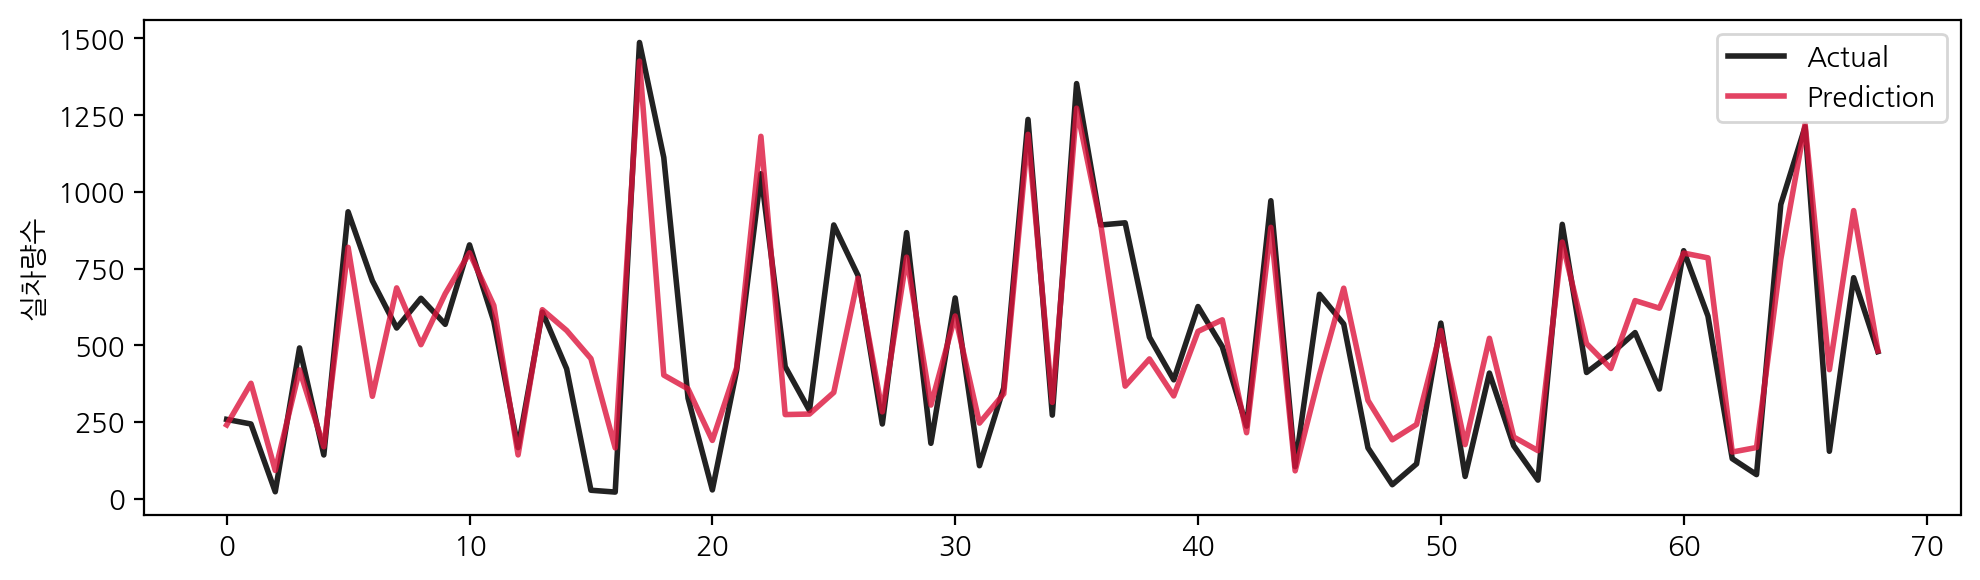

In [234]:
plt.figure(figsize=(10,3))
sns.lineplot(x=list(range(len(y_test))),
             y=y_test, color = '#222222',
             markers='o',
             label='Actual',
             linewidth=2)

sns.lineplot(x=list(range(len(y_pred))),
             y=y_pred, color='crimson', 
             linewidth=2,
             label='Prediction',
             alpha=0.8)

plt.legend()

plt.tight_layout()
plt.show()

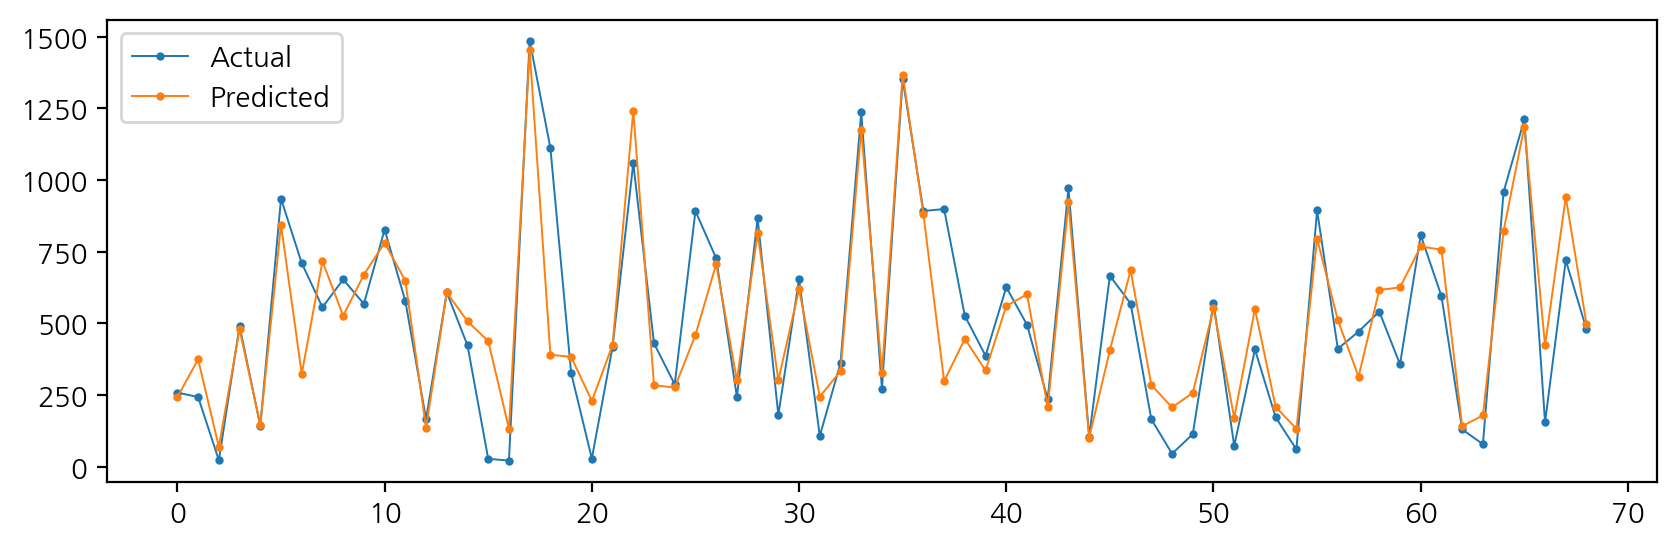

In [188]:
model_plot(y_test, y_pred)

## 3. 파이프라인 구축

- 새로운 데이터를 불러오고, 이 데이터를 처리할 파이프라인 함수를 만듭니다.

### (1) New Data 불러오기

- test.xlsx 파일을 읽어와 new_data 데이터프레임으로 선언합니다.
- 해당 데이터는 '실차량수' 변수가 없는 것 외에는, 최초 데이터와 동일한 구조입니다.
- 이 데이터를 대상으로 전처리와 예측을 수행합니다.

In [253]:
# 파일 읽어오기
new_data = pd.read_excel(path+'test.xlsx')

# 확인
new_data.head()

,단지코드,단지명,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,단지내주차면수,전용면적,공용면적,임대보증금,임대료
0,C0005,서울석촌 도시형주택(공임10년),20,6,서울,20121115,복도식,개별가스난방,전체동 설치,9,17.53,11.7251,50449000,263710
1,C0005,서울석촌 도시형주택(공임10년),20,10,서울,20121115,복도식,개별가스난방,전체동 설치,9,24.71,16.5275,52743000,321040
2,C0005,서울석촌 도시형주택(공임10년),20,4,서울,20121115,복도식,개별가스난방,전체동 설치,9,26.72,17.8720,53890000,332510
3,C0017,대구혁신센텀힐즈,822,228,대구경북,20180221,계단식,지역난방,NaN,824,51.87,20.9266,29298000,411200
4,C0017,대구혁신센텀힐즈,822,56,대구경북,20180221,계단식,지역난방,NaN,824,59.85,24.1461,38550000,462600


### (2) 데이터 파이프라인 구축

- 데이터 파이프라인 함수를 만듭니다.
- 학습 데이터에 대해 진행했던 모든 전처리 과정을 평가 데이터에도 일괄 진행해야 합니다.
    - 입력: new_data
    - 출력: 전처리가 완료된 예측 직전 데이터프레임
- 새로운 데이터에는 '실차량수' 변수가 없음을 유의합니다.
- 참고: 다음 내용들이 처리되어야 합니다.
    - 결측치 처리
    - 변수 추가
    - 불필요한 변수 제거
    - 단지 데이터, 상세 데이터 분리
    - 단지코드별 총면적 합 집계
    - 전용면적 구간별 집계 (피벗 형태)
    - 임대보증금, 임대료 평균 집계
    - 집계 결과 병합
    - 난방방식: 개별, 지역, 중앙 세 가지로 묶기
    - 승강기설치여부: 0, 1 값으로 변경
    - 단지모드, 지역 변수 제거
    - 가변수화

In [269]:
def data_pipeline(data):
    apt01 = data.copy()
    # 결측치 처리
    apt01.fillna({'건물형태':apt01['건물형태'].mode()[0], '난방방식':apt01['난방방식'].mode()[0], '승강기설치여부':apt01['승강기설치여부'].mode()[0],}, inplace=True)
    
    # 변수 추가
    apt01['준공연도'] = (apt01['준공일자']
                        .astype(str)
                        .str
                        .slice(0,4)
                        .astype(int))
    
    apt01['총면적'] = (apt01['전용면적'] + apt01['공용면적']) * apt01['전용면적별세대수'] 
    
    # 불필요한 변수 제거
    
    apt01.drop(columns=['단지명', '준공일자', '단지내주차면수'], inplace=True)
    
    # 단지 데이터, 상세 데이터 분리
    data01 = apt01[['단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부']]
    data01.drop_duplicates(inplace=True)
    data01.reset_index(drop=True, inplace=True)
    data02 = apt01[['단지코드', '총면적', '전용면적별세대수', '전용면적', '공용면적', '임대보증금', '임대료']]
    
    # 단지코드별 총면적 합 집계
    df_area = data02.groupby('단지코드')['총면적'].sum().reset_index()
    
    # 전용면적 구간별 집계 (피벗 형태)
    grades = ['10-30', '30-40','40-50','50-60','60-80', '80-90', '90-200']
    cut_bins = [10, 30, 40, 50, 60, 80, 90, 200]
    data02['전용면적구간'] = pd.cut(data02['전용면적'], bins=cut_bins, labels=grades)
    temp = data02.groupby(['단지코드', '전용면적구간'])['전용면적별세대수'].sum().reset_index()
    df_pivot =  temp.pivot(index='단지코드', columns='전용면적구간', values='전용면적별세대수')
    df_pivot.columns.name=None 
    df_pivot.reset_index(inplace=True)
    
    # 임대보증금, 임대료 평균 집계
    df_rent = data02.groupby('단지코드')[['임대보증금', '임대료']].mean().reset_index()
    
    # 집계 결과 병합
    base_data = pd.merge(left = data01 , right = df_area, how = "left", on = "단지코드")
    base_data = pd.merge(left = base_data , right = df_pivot, how = "left", on = "단지코드")
    base_data = pd.merge(left = base_data , right = df_rent, how = "left", on = "단지코드")
    
    # 난방방식: 개별, 지역, 중앙 세 가지로 묶기
    base_data.loc[base_data.난방방식.str.startswith('개별'), '난방방식'] = '개별'
    base_data.loc[base_data.난방방식.str.startswith('지역'), '난방방식'] = '지역'
    base_data.loc[base_data.난방방식.str.startswith('중앙'), '난방방식'] = '중앙'
    
    # 승강기설치여부: 0, 1 값으로 변경
    base_data.loc[base_data.승강기설치여부.str.contains('전체동 설치'), '승강기설치여부'] = 1
    base_data['승강기설치여부'] = base_data['승강기설치여부'].replace('일부동 설치', 0)
    base_data['승강기설치여부'] = base_data['승강기설치여부'].replace('미설치', 0)
    base_data['승강기설치여부'] = base_data['승강기설치여부'].astype(int)
    base_data.drop(columns=['단지코드', '지역'], inplace=True)
    
    # 가변수화
    dummy_cols = ['건물형태', '난방방식']
    base_data = pd.get_dummies(base_data, columns=dummy_cols, drop_first=True, dtype=int)

    return base_data


### (3) 예측하기

- new_data를 파이프라인을 사용해 전처리한 후 가장 성능이 좋았던 모델로 예측한 결과를 확인합니다.

In [270]:
# 데이터 전처리
data = data_pipeline(new_data)

# 확인
data.head()

,총세대수,준공연도,승강기설치여부,총면적,10-30,30-40,40-50,50-60,60-80,80-90,90-200,임대보증금,임대료,건물형태_복도식,건물형태_혼합식,난방방식_중앙,난방방식_지역
0,20,2012,1,766.2736,20,0,0,0,0,0,0,5.236067e+07,305753.333333,1,0,0,0
1,822,2018,1,31396.0944,0,0,0,404,0,0,0,3.546600e+07,445466.666667,0,0,0,1
2,112,2014,1,12450.4308,0,0,0,0,20,92,0,9.869750e+07,744450.000000,0,0,0,1
3,122,2011,1,13081.4772,0,0,0,0,22,100,0,0.000000e+00,0.000000,0,0,0,1
4,262,2011,1,28141.7516,0,0,0,0,77,185,0,0.000000e+00,0.000000,0,0,0,1


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   총세대수      30 non-null     int64  
 1   준공연도      30 non-null     int32  
 2   승강기설치여부   30 non-null     int32  
 3   총면적       30 non-null     float64
 4   10-30     30 non-null     int64  
 5   30-40     30 non-null     int64  
 6   40-50     30 non-null     int64  
 7   50-60     30 non-null     int64  
 8   60-80     30 non-null     int64  
 9   80-90     30 non-null     int64  
 10  90-200    30 non-null     int64  
 11  임대보증금     30 non-null     float64
 12  임대료       30 non-null     float64
 13  건물형태_복도식  30 non-null     int32  
 14  건물형태_혼합식  30 non-null     int32  
 15  난방방식_중앙   30 non-null     int32  
 16  난방방식_지역   30 non-null     int32  
dtypes: float64(3), int32(6), int64(8)
memory usage: 3.4 KB


In [272]:
# 예측하기
# data[r_cols] = r_scaler.transform(data[r_cols])
# data[m_cols] = m_scaler.transform(data[m_cols])

# predicted = final_s.predict(data)

# # 확인
# print(predicted)
predicted = final.predict(data)

print(predicted)

[ 153.40932573  462.31120318  738.76528755  678.58151843  733.29201565
  329.39208027  378.87931022  775.34168377  529.89573175  354.97727283
  260.35354928  175.30710221 1340.6012142   667.72922556  553.26671997
  699.0900721   635.64109095  196.90216058  975.20568682  928.43509473
  299.54532415  830.08197638  842.96630036  833.95199984  874.48756465
  280.85828277  111.41973102 1183.47745583  200.04009757  708.97938814]


- 아파트 기본 정보에 예측한 차량수를 붙여 마무리합니다.

In [273]:
# 데이터 셋 두개로 나누기
vars = ['단지코드', '단지명', '총세대수', '지역']
result = new_data[vars].copy()
result = result.drop_duplicates()
result.reset_index(drop=True, inplace=True)

# 예측 결과 추가
result['예상차량수'] = predicted.round(1).astype(int)

# 확인
result

,단지코드,단지명,총세대수,지역,예상차량수
0,C0005,서울석촌 도시형주택(공임10년),20,서울,153
1,C0017,대구혁신센텀힐즈,822,대구경북,462
2,C0034,광교 호반마을 22단지 아파트,112,경기,738
3,C0046,죽미마을 휴먼시아12단지,122,경기,678
4,C0055,파주운정 한울마을 6단지,262,경기,733
5,C0072,벌교제석휴먼시아,35,광주전남,329
6,C0073,무안남악오룡마을,47,광주전남,378
7,C0084,진해 석동우림필유 아파트,152,경남,775
8,C0085,김해북부 두산위브 아파트,73,경남,529
9,C0112,운암주공6단지아파트,571,경기,355


In [274]:
result.to_excel("./지역제거예측값.xlsx", index=False)

### 결론
주차 수요는
총 세대수가 많을수록
총면적이 넓을수록
비례한다는 것을 알았으며



지역 변수를 추가해서 예측을 수행해 보았지만, 
오히려 예측 성능이 감소하는 결과를 확인하였다.
분석 과정에서는 의미있는 변수라 생각했지만 
모델링 과정에서는 유의미하지 않다는 것을 알게 되었다.